In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/code/PhasorNetworks.jl`


In [2]:
include("../src/PhasorNetworks.jl")
using .PhasorNetworks, Plots, DifferentialEquations

In [3]:
using Statistics

In [4]:
n_x = 101
phases = range(-1.0, 1.0, n_x) |> collect;

In [5]:
import .PhasorNetworks: spike_current, phase_memory, neuron_constant

In [6]:
spk_args = SpikingArgs()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)


In [7]:
repeats = 6
tspan = (0.0, repeats*1.0)

(0.0, 6.0)

In [8]:
tbase = collect(tspan[1]:spk_args.solver_args[:dt]:tspan[2]);

In [9]:
st = phase_to_train(phases, spk_args=spk_args, repeats = repeats)

Spike Train: (101,) with 606 spikes.

In [10]:
u = phase_memory(st, tspan=tspan, spk_args=spk_args);

In [11]:
u |> size

(101, 601)

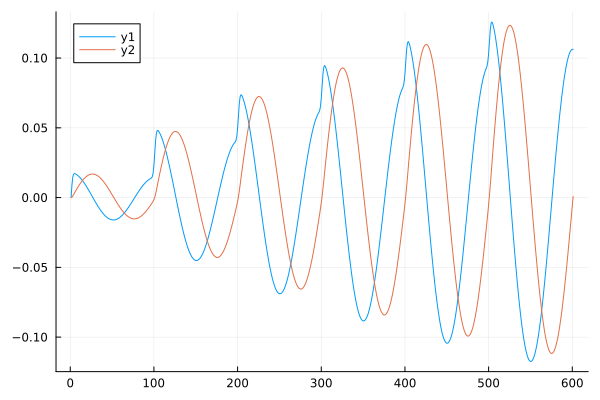

In [12]:
plot(real.(u[1,:]))
plot!(imag.(u[1,:]))

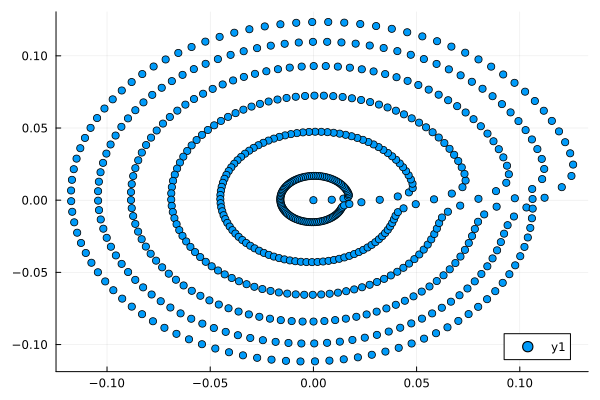

In [13]:
scatter(real.(u[1,:]), imag.(u[1,:]))

In [14]:
sort!(unique(cat(u.t, u.t .+ 0.01, dims=1)))

603-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.060000000000000005
 0.07
 0.08
 0.09
 0.09999999999999999
 0.10999999999999999
 0.11999999999999998
 ⋮
 5.909999999999918
 5.919999999999918
 5.929999999999918
 5.939999999999918
 5.949999999999918
 5.959999999999917
 5.969999999999917
 5.979999999999917
 5.989999999999917
 5.9999999999999165
 6.0
 6.01

In [15]:
Array(u(u.t))

101×601 Matrix{ComplexF64}:
 0.0+0.0im     0.008884+0.000314159im  …   0.106187+0.000833057im
 0.0+0.0im   0.00888622+0.000244667im      0.108922-0.00588037im
 0.0+0.0im   0.00572972+0.000115573im      0.110281-0.0127688im
 0.0+0.0im   0.00236534+3.31121e-5im       0.110193-0.0197293im
 0.0+0.0im  0.000618391+5.75403e-6im        0.10914-0.0266726im
 0.0+0.0im  0.000101211+6.0647e-7im    …   0.107494-0.0335455im
 0.0+0.0im   1.02681e-5+3.87703e-8im       0.105388-0.040314im
 0.0+0.0im   6.40927e-7+1.50329e-9im       0.102852-0.0469499im
 0.0+0.0im   2.44871e-8+3.5354e-11im      0.0998989-0.0534264im
 0.0+0.0im  5.62676e-10+0.0im             0.0965377-0.0597171im
 0.0+0.0im  8.02614e-12+0.0im          …  0.0927804-0.0657963im
 0.0+0.0im          0.0+0.0im             0.0886402-0.0716391im
 0.0+0.0im          0.0+0.0im             0.0841321-0.0772215im
    ⋮                                  ⋱           ⋮
 0.0+0.0im          0.0+0.0im              0.101958+0.0857643im
 0.0+0.0im          0

In [16]:
typeof(u)

ODESolution{ComplexF32, 2, Vector{Vector{ComplexF32}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{ComplexF32}}}, Nothing, ODEProblem{Vector{ComplexF32}, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, ODEFunction{false, SciMLBase.AutoSpecialize, Main.PhasorNetworks.var"#dzdt#113"{SpikingArgs, SpikeTrain, Main.PhasorNetworks.var"#27#28"{Float64, Float64}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}, SciMLBase.StandardODEProblem}, Heun{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}, OrdinaryDiffEqCore.InterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, Main.PhasorNetworks.var"#dzdt#113"{SpikingArgs, SpikeTrain, Main.PhasorNetworks.var"#27#28"{Float64, Float64

In [17]:
st1 = solution_to_train(u, tspan, spk_args = spk_args, offset=0.0)

Spike Train: (101,) with 606 spikes.

In [18]:
p1 = train_to_phase(st1, spk_args=spk_args)

6×101 Matrix{Float64}:
 0.997326  -0.982654  -0.962014  -0.941465  …  0.955291  0.968571  0.997326
 0.996732  -0.983247  -0.962607  -0.942058     0.956919  0.973878  0.996732
 0.996182  -0.983797  -0.963157  -0.942608     0.957058  0.974941  0.996182
 0.995674  -0.984305  -0.963665  -0.943116     0.95688   0.975171  0.995674
 0.995208  -0.984771  -0.964131  -0.943583     0.956602  0.975119  0.995208
 0.997503  -0.982832  -0.963308  -0.943606  …  0.956296  0.974951  0.997503

In [19]:
err2 = p1[end-1,:] .- phases;

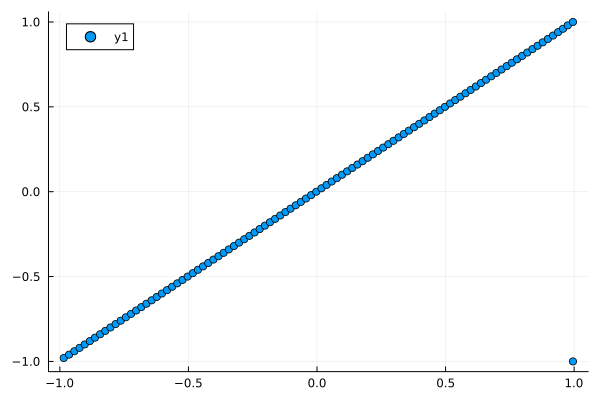

In [20]:
scatter(p1[end-1,:], phases)

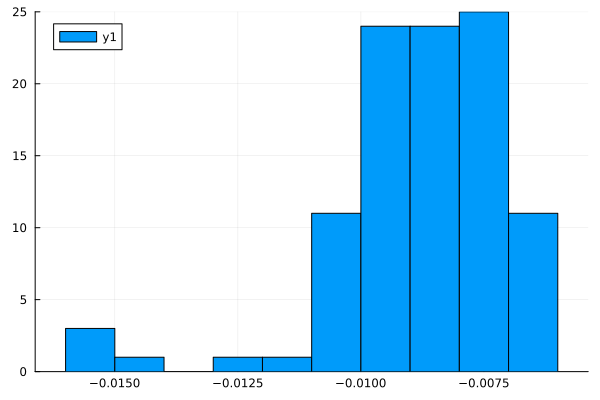

In [21]:
histogram(arc_error(err2))

In [22]:
u_arr = Array(u);

In [23]:
u_arr

101×601 Matrix{ComplexF32}:
 0.0+0.0im     0.008884+0.000314159im  …   0.106187+0.000833057im
 0.0+0.0im   0.00888622+0.000244667im      0.108922-0.00588037im
 0.0+0.0im   0.00572972+0.000115573im      0.110281-0.0127688im
 0.0+0.0im   0.00236534+3.31121f-5im       0.110193-0.0197293im
 0.0+0.0im  0.000618391+5.75403f-6im        0.10914-0.0266726im
 0.0+0.0im  0.000101211+6.0647f-7im    …   0.107494-0.0335455im
 0.0+0.0im   1.02681f-5+3.87703f-8im       0.105388-0.040314im
 0.0+0.0im   6.40927f-7+1.50329f-9im       0.102852-0.0469499im
 0.0+0.0im   2.44871f-8+3.5354f-11im      0.0998989-0.0534264im
 0.0+0.0im  5.62676f-10+0.0im             0.0965377-0.0597171im
 0.0+0.0im  8.02614f-12+0.0im          …  0.0927804-0.0657963im
 0.0+0.0im          0.0+0.0im             0.0886402-0.0716391im
 0.0+0.0im          0.0+0.0im             0.0841321-0.0772215im
    ⋮                                  ⋱           ⋮
 0.0+0.0im          0.0+0.0im              0.101958+0.0857643im
 0.0+0.0im          0

In [24]:
using CUDA

In [25]:
gt = cu(st.times)

606-element CuArray{Float32, 1, CUDA.DeviceMemory}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 ⋮
 5.89
 5.9
 5.91
 5.92
 5.93
 5.94
 5.95
 5.96
 5.97
 5.98
 5.99
 5.0

In [26]:
typeof(gt) <: CuArray{<:Real}

true

In [27]:
stg = SpikeTrainGPU(st)

SpikeTrainGPU(CartesianIndex{1}[CartesianIndex(1,), CartesianIndex(2,), CartesianIndex(3,), CartesianIndex(4,), CartesianIndex(5,), CartesianIndex(6,), CartesianIndex(7,), CartesianIndex(8,), CartesianIndex(9,), CartesianIndex(10,)  …  CartesianIndex(92,), CartesianIndex(93,), CartesianIndex(94,), CartesianIndex(95,), CartesianIndex(96,), CartesianIndex(97,), CartesianIndex(98,), CartesianIndex(99,), CartesianIndex(100,), CartesianIndex(101,)], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  597, 598, 599, 600, 601, 602, 603, 604, 605, 606], Float32[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  5.91, 5.92, 5.93, 5.94, 5.95, 5.96, 5.97, 5.98, 5.99, 5.0], (101,), 101, 0.0)

In [28]:
using ChainRulesCore: ignore_derivatives

In [29]:
import .PhasorNetworks: gaussian_kernel

In [30]:
using CUDA

In [31]:
stg.indices

606-element CuArray{CartesianIndex{1}, 1, CUDA.DeviceMemory}:
 CartesianIndex(1,)
 CartesianIndex(2,)
 CartesianIndex(3,)
 CartesianIndex(4,)
 CartesianIndex(5,)
 CartesianIndex(6,)
 CartesianIndex(7,)
 CartesianIndex(8,)
 CartesianIndex(9,)
 CartesianIndex(10,)
 CartesianIndex(11,)
 CartesianIndex(12,)
 CartesianIndex(13,)
 ⋮
 CartesianIndex(90,)
 CartesianIndex(91,)
 CartesianIndex(92,)
 CartesianIndex(93,)
 CartesianIndex(94,)
 CartesianIndex(95,)
 CartesianIndex(96,)
 CartesianIndex(97,)
 CartesianIndex(98,)
 CartesianIndex(99,)
 CartesianIndex(100,)
 CartesianIndex(101,)

In [32]:
function scatter_add_kernel!(output, values, indices)
    i = (blockIdx().x - 1) * blockDim().x + threadIdx().x
    if i <= length(indices)
        index = indices[i]
        value = values[i]
        CUDA.@atomic output[index] += value
    end
    return nothing
end

function parallel_scatter_add(indices::CuArray{Int}, values::CuArray{T}, output_size::Int) where T
    output = CUDA.zeros(T, output_size)
    threads = 256
    blocks = cld(length(indices), threads)
    
    @cuda threads=threads blocks=blocks scatter_add_kernel!(output, values, indices)
    
    return output
end


parallel_scatter_add (generic function with 1 method)

In [33]:
# Set up sample data
n = 1_000_000
m = 100_000

# Create indices and values on the GPU
d_indices = rand(1:n, m) |> CuArray{Int}
d_values = CUDA.rand(Float32, m)

# Perform parallel scatter-add
result = parallel_scatter_add(d_indices, d_values, n)

println("First 10 elements of the result: ", Array(result)[1:10])

# Verify with CPU implementation
cpu_indices = Array(d_indices)
cpu_values = Array(d_values)
cpu_result = zeros(Float32, n)
for (idx, val) in zip(cpu_indices, cpu_values)
    cpu_result[idx] += val
end

println("Max difference between GPU and CPU results: ", maximum(abs.(Array(result) - cpu_result)))


First 10 elements of the result: Float32[0.0, 0.0, 0.0, 0.007005835, 0.0, 0.0, 0.09844253, 0.0, 0.0, 0.0]
Max difference between GPU and CPU results: 2.3841858e-7


In [34]:
function spike_current(train::SpikeTrainGPU, t::Real, spk_args::SpikingArgs)
    scale = spk_args.spk_scale

    #add currents into the synapses
    current_kernel = x -> gaussian_kernel(x, t, spk_args.t_window)
    impulses = current_kernel(train.times)
    
    current = parallel_scatter_add(train.linear_indices, impulses, train.linear_shape)

    return current
end


spike_current (generic function with 2 methods)

In [35]:
stg.linear_indices

606-element CuArray{Int64, 1, CUDA.DeviceMemory}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 595
 596
 597
 598
 599
 600
 601
 602
 603
 604
 605
 606

In [36]:
ival = spike_current(stg, 0.4, spk_args)

101-element CuArray{Float64, 1, CUDA.DeviceMemory}:
 1.9151695967140057e-174
 7.236408365193862e-166
 1.6584090690839577e-157
 2.3052234555541416e-149
 1.9435117223039787e-141
 9.938377371644518e-134
 3.082433669369418e-126
 5.798658269985809e-119
 6.616242127461842e-112
 4.5788153506567096e-105
 1.921952023716585e-98
 4.893108033142025e-92
 7.555790646964772e-86
 ⋮
 2.064203254888655e-261
 3.681075257441117e-272
 3.980925941682492e-283
 2.6116284345687722e-294
 1.0391825650020618e-305
 2.5079884e-317
 0.0
 0.0
 0.0
 0.0
 0.0
 1.9151695967140057e-174

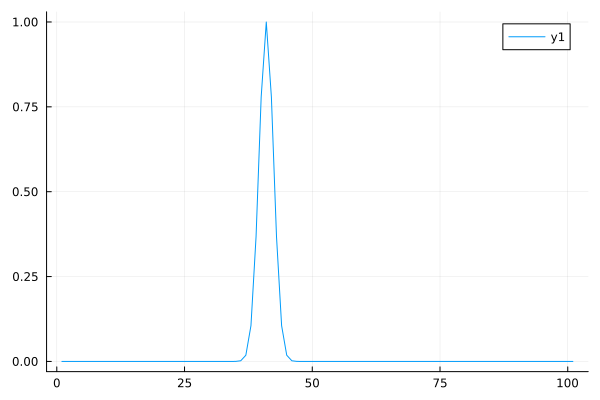

In [38]:
plot(Array(ival))

In [44]:
ivals = stack([Array(spike_current(stg, t, spk_args)) for t in 0.0:0.01:1.0], dims=1)

101×101 Matrix{Float64}:
 1.0          0.778801     0.367879     …  0.0          1.0
 0.778801     1.0          0.778801        0.0          0.778801
 0.367879     0.778801     1.0             0.0          0.367879
 0.105399     0.367879     0.778801        0.0          0.105399
 0.0183156    0.105399     0.367879        0.0          0.0183156
 0.00193045   0.0183156    0.105399     …  0.0          0.00193045
 0.00012341   0.00193045   0.0183156       0.0          0.00012341
 4.78512e-6   0.00012341   0.00193045      0.0          4.78512e-6
 1.12535e-7   4.78512e-6   0.00012341      0.0          1.12535e-7
 1.60523e-9   1.12535e-7   4.78512e-6      0.0          1.60523e-9
 1.38879e-11  1.60523e-9   1.12535e-7   …  0.0          1.38879e-11
 7.28772e-14  1.38879e-11  1.60523e-9      0.0          7.28772e-14
 2.31952e-16  7.28772e-14  1.38879e-11     0.0          2.31952e-16
 ⋮                                      ⋱               ⋮
 0.0          0.0          0.0             1.38879e-11  0

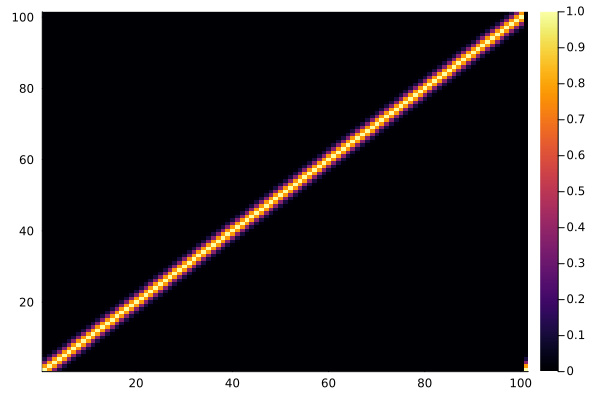

In [45]:
heatmap(ivals)